In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Exploration

In [2]:
df = pd.read_csv('./data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
counts = df["HeartDisease"].value_counts()
print(counts)

HeartDisease
1    508
0    410
Name: count, dtype: int64


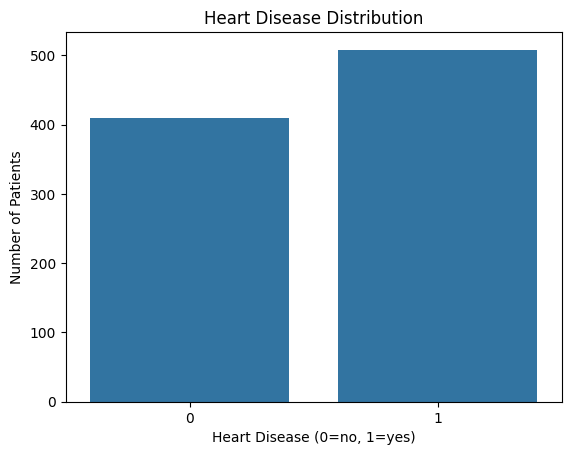

In [11]:
sns.countplot(x='HeartDisease',data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0=no, 1=yes)')
plt.ylabel('Number of Patients')
plt.show()

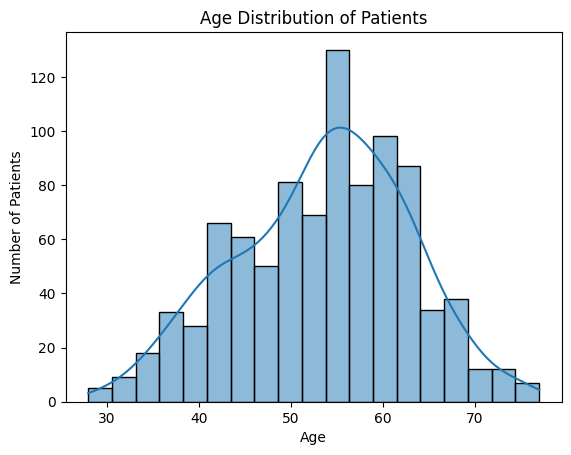

In [12]:
sns.histplot(df["Age"],kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

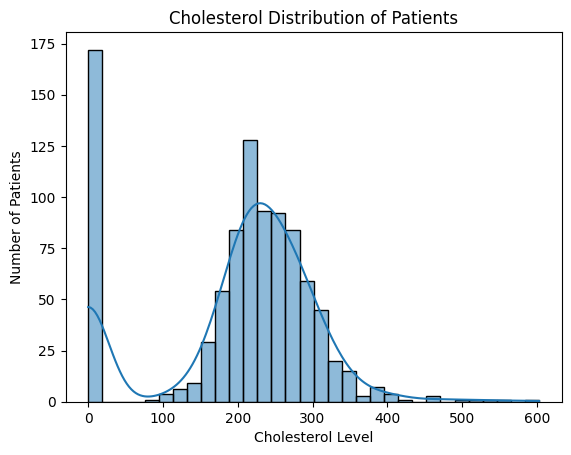

In [14]:
sns.histplot(df["Cholesterol"],kde=True)
plt.title("Cholesterol Distribution of Patients")
plt.xlabel("Cholesterol Level")
plt.ylabel("Number of Patients")
plt.show()

In [4]:
# Data cleaning (from exploration results)
df["Cholesterol"] = df["Cholesterol"].replace(0,np.nan)

In [8]:
df[df["Cholesterol"].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,NaN,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,NaN,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,NaN,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,NaN,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,NaN,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,NaN,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,NaN,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,NaN,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,NaN,0,LVH,122,Y,1.0,Flat,1


In [5]:
df["Cholesterol"].isna().sum()

172

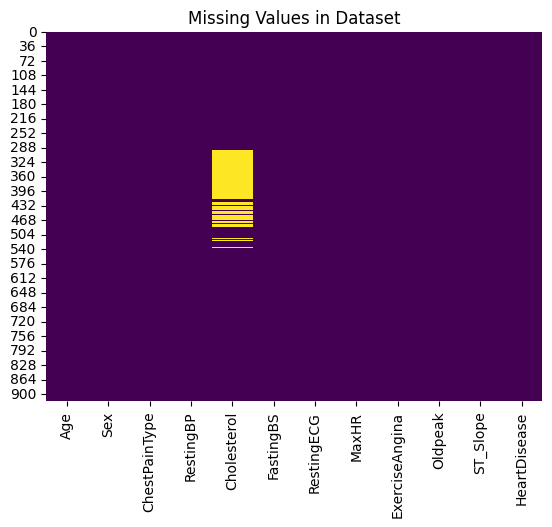

In [31]:
sns.heatmap(df.isna(),cbar=False,cmap="viridis")
plt.title("Missing Values in Dataset")
plt.show()

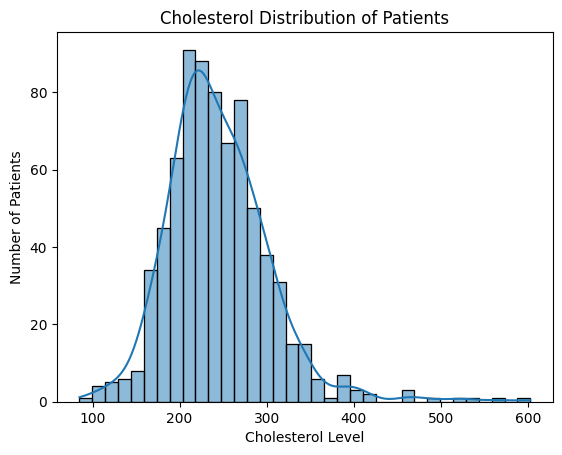

In [18]:
sns.histplot(df["Cholesterol"],kde=True)
plt.title("Cholesterol Distribution of Patients")
plt.xlabel("Cholesterol Level")
plt.ylabel("Number of Patients")
plt.show()

In [6]:
# Median Imputation method
chol_median = df["Cholesterol"].median()
df["Cholesterol"] = df["Cholesterol"].fillna(chol_median)

In [7]:
df["Cholesterol"].isna().sum()

0

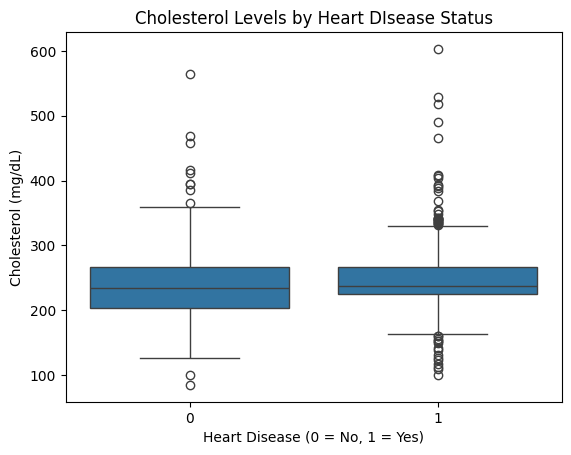

In [8]:
sns.boxplot(x="HeartDisease",y="Cholesterol",data=df)
plt.title("Cholesterol Levels by Heart DIsease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol (mg/dL)")
plt.show()